# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

__Вторая часть задания про градиентный бустинг и третья про SVM ждут вас в соседних ноутбуках.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,584,100,51,89,199,65,6,201,32,23,159,219,622,205,74,6,7,193,193
1,659,96,50,94,215,67,9,187,35,22,158,214,525,214,67,8,6,193,201
2,575,109,54,103,220,66,11,214,31,24,167,229,677,212,70,1,23,188,201
3,428,112,50,104,197,58,11,208,32,24,159,223,639,186,67,15,22,191,202
4,89,80,37,57,116,55,6,125,54,18,125,142,229,132,81,8,5,178,184
5,603,90,36,85,184,64,6,160,41,20,125,187,385,139,66,9,31,195,203
6,36,82,44,72,118,52,7,152,44,19,147,174,340,177,82,2,2,180,185
7,637,86,44,65,129,56,6,152,45,19,150,168,331,177,83,4,13,178,183
8,252,84,44,80,140,58,11,156,44,20,157,166,349,176,74,5,17,183,193
9,839,90,44,72,157,64,8,137,48,18,144,159,283,171,65,9,4,196,203


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,433.972678,93.083789,44.595628,81.083789,166.493625,61.293260,8.395264,166.608379,41.451730,20.417122,147.54827,186.415301,427.417122,173.923497,72.595628,6.185792,12.515483,188.617486,195.384335
std,241.227338,8.110341,6.022499,15.980494,34.173645,7.412726,3.847273,32.007834,7.722369,2.487002,14.25728,30.316918,168.595537,31.792002,7.228319,4.873032,9.027444,6.268574,7.603292
min,0.000000,76.000000,33.000000,40.000000,104.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.00000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,231.000000,87.000000,40.000000,69.000000,138.000000,56.000000,7.000000,146.000000,34.000000,19.000000,137.00000,166.000000,314.000000,150.000000,68.000000,2.000000,5.000000,184.000000,189.000000
50%,440.000000,92.000000,44.000000,78.000000,164.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.00000,176.000000,363.000000,173.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,639.000000,98.000000,49.000000,96.000000,193.000000,65.000000,10.000000,192.000000,46.000000,22.000000,158.00000,214.000000,558.000000,195.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,261.000000,61.000000,28.000000,186.00000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


In [5]:
classes = np.unique(y_train)
classes

array(['bus', 'opel', 'saab', 'van'], dtype=object)

### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

*by terana*:


**I will standardize the data so as to increase the speed of lerning and to avoid numerical overflow.**

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
std_data = StandardScaler().fit_transform(data)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(std_data, target, test_size=0.35)

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, f1_score, roc_auc_score, accuracy_score, auc
from sklearn.preprocessing import label_binarize

In [9]:
parameters = {'clf__C': np.linspace(0.01, 10, 10),
              'clf__penalty': ['l1', 'l2']}

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000))])

clf = GridSearchCV(pipe, param_grid=parameters, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [10]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.0s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=10000,
                                                           multi_class='mul

In [11]:
print("best accuracy: ", clf.best_score_)
print("best params: ", clf.best_params_)
best_log_reg = clf.best_estimator_
best_lr_c = clf.best_params_['clf__C']
best_lr_penalty = clf.best_params_['clf__penalty']

best accuracy:  0.8069216757741348
best params:  {'clf__C': 4.45, 'clf__penalty': 'l2'}


In [12]:
y_score = best_log_reg.predict(X_test)

f1_micro = f1_score(y_test, y_score, average='micro')
print(f"f1_micro: {f1_micro}")
f1_macro = f1_score(y_test, y_score, average='macro')
print(f"f1_macro: {f1_macro}")
accuracy = accuracy_score(y_test, y_score)
print(f"accuracy: {accuracy}")

f1_micro: 0.7609427609427609
f1_macro: 0.7676377401213794
accuracy: 0.7609427609427609


In [13]:
y_score_bin = label_binarize(best_log_reg.predict(X_test), classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

AUC for bus: 0.9452160493827161


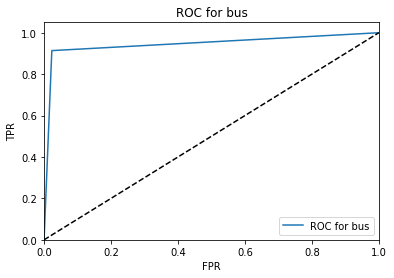

AUC for opel: 0.7123423423423423


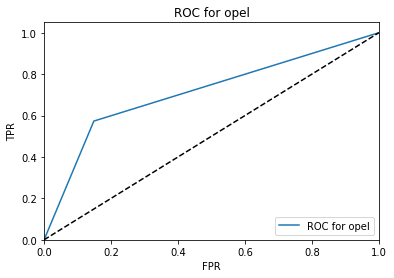

AUC for saab: 0.7412337662337662


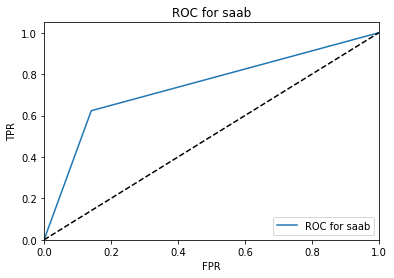

AUC for van: 0.9722706545064378


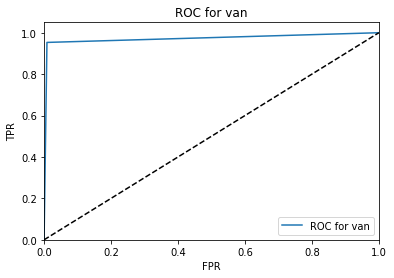

In [15]:
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f"ROC for {classes[i]}")
    print(f"AUC for {classes[i]}: {roc_auc[i]}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC for {classes[i]}')
    plt.legend(loc="lower right")
    plt.show()

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [33]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

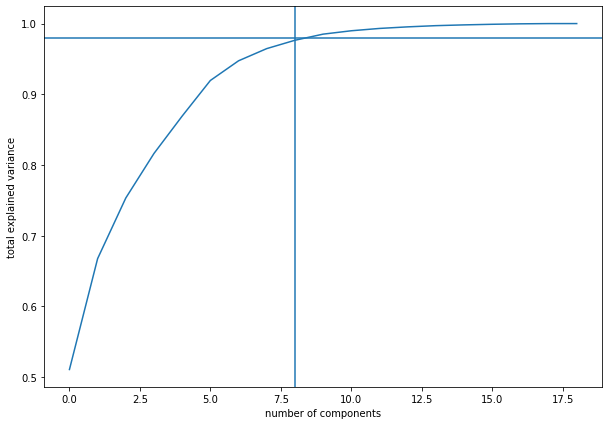

In [36]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('total explained variance')
plt.axvline(8)
plt.axhline(0.98)
plt.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

**We will take 10 components, since the total explained variance >= 0.98 starting from 8 components (see the plot above).**

In [25]:
pca = PCA(n_components=8)
pca.fit(X_train_std)
X_train_std_pca = pca.fit_transform(X_train_std)
pca.fit(X_test_std)
X_test_std_pca = pca.fit_transform(X_test_std)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [26]:
params = {'C': np.linspace(0.01, 10, 10), 'penalty': ['l1', 'l2']}

log_reg_pca_cv = GridSearchCV(
    LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100000),
    params,
    cv=6
)
log_reg_pca_cv.fit(X_train_std_pca, y_train_std)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-03, 2.22311111e+00, 4.44522222e+00, 6.66733333e+00,
       8.88944444e+00, 1.11115556e+01, 1.33336667e+01, 1.55557778e+01,
       1.77778889e+01, 2.00000000e+01]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='

In [27]:
print(log_reg_pca_cv.best_params_)
print(f"best accuracy: {log_reg_pca_cv.best_score_}")

{'C': 4.445222222222222, 'penalty': 'l2'}
best accuracy: 0.6575591985428051


In [28]:
y_score = log_reg_pca_cv.predict(X_test_std_pca)

f1_micro = f1_score(y_test_std, y_score, average='micro')
print(f"f1_micro: {f1_micro}")
f1_macro = f1_score(y_test_std, y_score, average='macro')
print(f"f1_macro: {f1_macro}")
accuracy = accuracy_score(y_test_std, y_score)
print(f"accuracy: {accuracy}")

f1_micro: 0.5521885521885522
f1_macro: 0.5462383780716653
accuracy: 0.5521885521885522


In [29]:
y_score_bin = label_binarize(y_score, classes=classes)
y_test_bin = label_binarize(y_test_std, classes=classes)

AUC for bus: 0.772132796780684


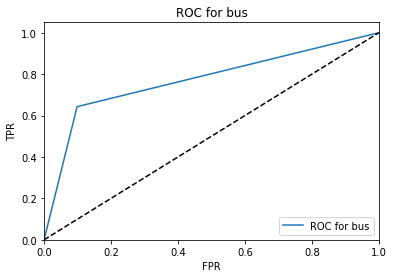

AUC for opel: 0.5792934189795176


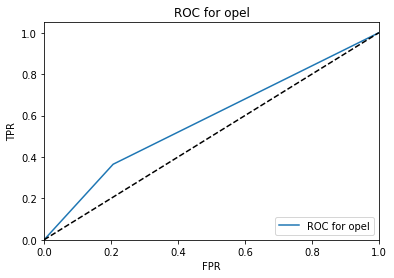

AUC for saab: 0.5934136497064579


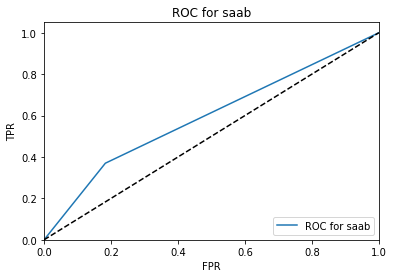

AUC for van: 0.724025974025974


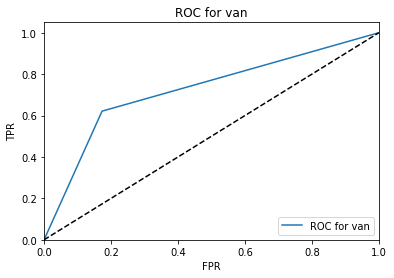

In [23]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f"ROC for {classes[i]}")
    print(f"AUC for {classes[i]}: {roc_auc[i]}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC for {classes[i]}')
    plt.legend(loc="lower right")
    plt.show()

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
params = {'max_depth': range(1, 15)}
tree = GridSearchCV(DecisionTreeClassifier(), params, cv=7, n_jobs=-1, verbose=True)
tree.fit(X_train_std, y_train_std)

Fitting 7 folds for each of 14 candidates, totalling 98 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    2.1s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(1, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [39]:
print(tree.best_params_)
best_max_depth = tree.best_params_['max_depth']
print(f"best accuracy: {tree.best_score_}")
best_tree = tree.best_estimator_

{'max_depth': 14}
best accuracy: 0.6958105646630237


In [40]:
print(f"f1 micro {f1_score(y_test_std, best_tree.predict(X_test_std), average='micro')}")
print(f"f1 macro {f1_score(y_test_std, best_tree.predict(X_test_std), average='macro')}")
print(f"accuracy {accuracy_score(y_test_std, best_tree.predict(X_test_std))}")

f1 micro 0.7272727272727273
f1 macro 0.7141798941798941
accuracy 0.7272727272727273


In [41]:
params = {'max_depth': range(1, 15)}
tree = GridSearchCV(DecisionTreeClassifier(), params, cv=7, n_jobs=-1, verbose=True)
tree.fit(X_train_std_pca, y_train_std)

Fitting 7 folds for each of 14 candidates, totalling 98 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    1.6s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(1, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [42]:
print(tree.best_params_)
print(f"best accuracy: {tree.best_score_}")

{'max_depth': 5}
best accuracy: 0.5883424408014571


In [43]:
y_pred = tree.best_estimator_.predict(X_test_std_pca)
print(f"f1 micro {f1_score(y_test_std, y_pred, average='micro')}")
print(f"f1 macro {f1_score(y_test_std, y_pred, average='macro')}")
print(f"accuracy {accuracy_score(y_test_std, y_pred)}")

f1 micro 0.4781144781144781
f1 macro 0.46757208915497545
accuracy 0.4781144781144781


**Decision tree works much better on the original data comparing to PCA.**

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [45]:
from sklearn.ensemble import BaggingClassifier

In [50]:
# Bagging with Logistic regression

accuracies_test = {}
accuracies_train = {}
f1_scores_test = {}
f1_scores_train = {}

for i in range(2, 51):
    lr_bagging = BaggingClassifier(
        LogisticRegression(
            C=best_lr_c,
            penalty=best_lr_penalty, 
            solver='saga', 
            multi_class='multinomial', 
            max_iter=10000), 
        n_estimators=i, 
        bootstrap=True)
    
    lr_bagging.fit(X_train_std, y_train_std)
    y_pred_test = lr_bagging.predict(X_test_std)
    y_pred_train = lr_bagging.predict(X_train_std)
    
    accuracies_test[i] = accuracy_score(y_test_std, y_pred_test)
    accuracies_train[i] = accuracy_score(y_train_std, y_pred_train)
    
    f1_scores_test[i] = f1_score(y_test_std, y_pred_test, average='micro')
    f1_scores_train[i] = f1_score(y_train_std, y_pred_train, average='micro')

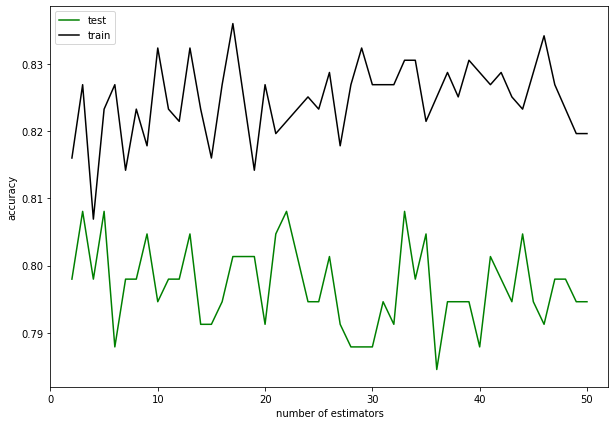

In [51]:
# accuracy scores plot
plt.figure(figsize=(10,7))
plt.plot(list(accuracies_test.keys()), list(accuracies_test.values()), color='g', label="test")
plt.plot(list(accuracies_train.keys()), list(accuracies_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.xlim(0, 52)
plt.legend()

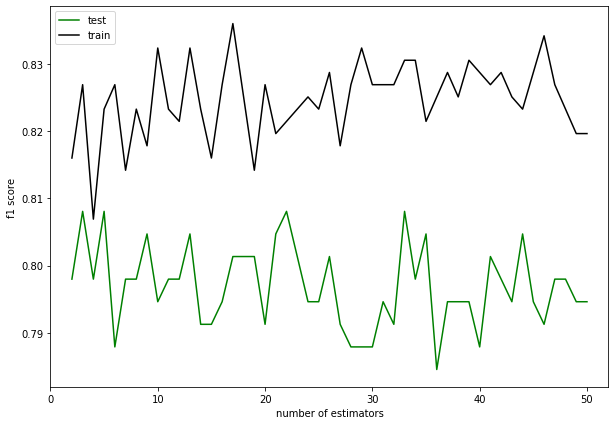

In [52]:
# f1 scores plot
plt.figure(figsize=(10,7))
plt.plot(list(f1_scores_test.keys()), list(f1_scores_test.values()), color='g', label="test")
plt.plot(list(f1_scores_train.keys()), list(f1_scores_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('f1 score')
plt.xlim(0, 52)
plt.legend()

In [53]:
# Bagging with Decision Trees

from sklearn.ensemble import BaggingClassifier

accuracies_test = {}
accuracies_train = {}
f1_scores_test = {}
f1_scores_train = {}
for i in range(2, 51):
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=best_max_depth), n_estimators=i, bootstrap=True)
    bagging.fit(X_train_std, y_train_std)
    
    y_pred_test = bagging.predict(X_test_std)
    y_pred_train = bagging.predict(X_train_std)
    
    accuracies_test[i] = accuracy_score(y_test_std, y_pred_test)
    accuracies_train[i] = accuracy_score(y_train_std, y_pred_train)
    
    f1_scores_test[i] = f1_score(y_test_std, y_pred_test, average='micro')
    f1_scores_train[i] = f1_score(y_train_std, y_pred_train, average='micro')

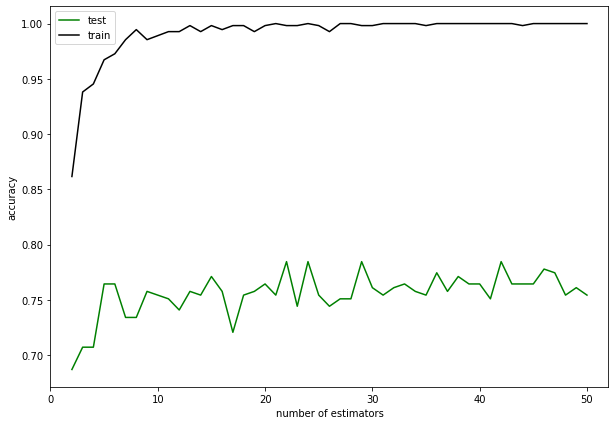

In [54]:
# accuracy scores plot
plt.figure(figsize=(10,7))
plt.plot(list(accuracies_test.keys()), list(accuracies_test.values()), color='g', label="test")
plt.plot(list(accuracies_train.keys()), list(accuracies_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.xlim(0, 52)
plt.legend()

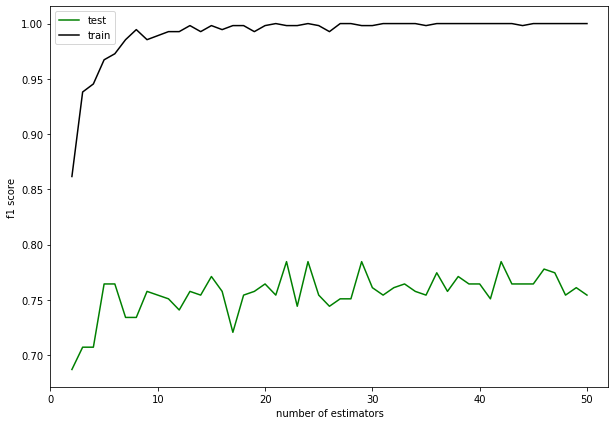

In [55]:
# f1 scores plot
plt.figure(figsize=(10,7))
plt.plot(list(f1_scores_test.keys()), list(f1_scores_test.values()), color='g', label="test")
plt.plot(list(f1_scores_train.keys()), list(f1_scores_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('f1 score')
plt.xlim(0, 52)
plt.legend()

In [56]:
#TBD conclusion

In [64]:
best_lr_n_estimators = 19
best_dt_n_estimators = 19

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
accuracies_test = {}
accuracies_train = {}
f1_scores_test = {}
f1_scores_train = {}
for i in range(2, 51):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train_std, y_train_std)
    
    y_pred_test = rf.predict(X_test_std)
    y_pred_train = rf.predict(X_train_std)
    
    accuracies_test[i] = accuracy_score(y_test_std, y_pred_test)
    accuracies_train[i] = accuracy_score(y_train_std, y_pred_train)
    
    f1_scores_test[i] = f1_score(y_test_std, y_pred_test, average='micro')
    f1_scores_train[i] = f1_score(y_train_std, y_pred_train, average='micro')

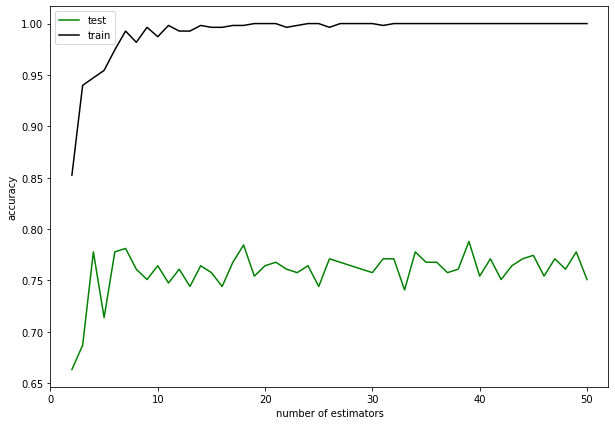

In [59]:
# accuracy scores plot
plt.figure(figsize=(10,7))
plt.plot(list(accuracies_test.keys()), list(accuracies_test.values()), color='g', label="test")
plt.plot(list(accuracies_train.keys()), list(accuracies_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.xlim(0, 52)
plt.legend()

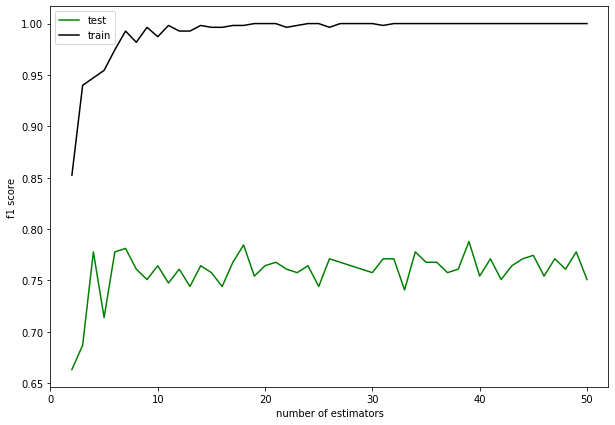

In [60]:
# f1 scores plot
plt.figure(figsize=(10,7))
plt.plot(list(f1_scores_test.keys()), list(f1_scores_test.values()), color='g', label="test")
plt.plot(list(f1_scores_train.keys()), list(f1_scores_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('f1 score')
plt.xlim(0, 52)
plt.legend()

In [62]:
best_rf_n_estimators = 32

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [86]:
#splitted = np.array_split(X_train_std, 10)

lr = LogisticRegression(
            C=best_lr_c,
            penalty=best_lr_penalty, 
            solver='saga', 
            multi_class='multinomial', 
            max_iter=10000)

dt = DecisionTreeClassifier(max_depth=best_max_depth)
bg_dt = BaggingClassifier(
    DecisionTreeClassifier(max_depth=best_max_depth), 
    n_estimators=best_dt_n_estimators, 
    bootstrap=True)
bg_lr = BaggingClassifier(
    LogisticRegression(
            C=best_lr_c,
            penalty=best_lr_penalty, 
            solver='saga', 
            multi_class='multinomial', 
            max_iter=100000),
    n_estimators=best_lr_n_estimators, 
    bootstrap=True)
rf = RandomForestClassifier(n_estimators=best_rf_n_estimators)

In [87]:
def draw(model):
    accuracies_test = {}
    accuracies_train = {}
    f1_scores_test = {}
    f1_scores_train = {}
    scores_dict = {}
    
    for i in range(1, 10):
        model.fit(X_train_std[0:i*58], y_train_std[0:i*58])
        
        y_pred_test = model.predict(X_test_std)
        y_pred_train = model.predict(X_train_std)

        accuracies_test[i] = accuracy_score(y_test_std, y_pred_test)
        accuracies_train[i] = accuracy_score(y_train_std, y_pred_train)

        f1_scores_test[i] = f1_score(y_test_std, y_pred_test, average='micro')
        f1_scores_train[i] = f1_score(y_train_std, y_pred_train, average='micro')

    # accuracy
    plt.figure(figsize=(7,5))
    plt.plot(list(accuracies_test.keys()), list(accuracies_test.values()), color='g', label="test")
    plt.plot(list(accuracies_train.keys()), list(accuracies_train.values()), color='k', label="train")
    plt.xlabel('number of estimators')
    plt.ylabel('accuracy')
    plt.xlim(0, 11)
    plt.legend()
    
    # f1
    plt.figure(figsize=(7,5))
    plt.plot(list(f1_scores_test.keys()), list(f1_scores_test.values()), color='g', label="test")
    plt.plot(list(f1_scores_train.keys()), list(f1_scores_train.values()), color='k', label="train")
    plt.xlabel('number of estimators')
    plt.ylabel('f1 score')
    plt.xlim(0, 11)
    plt.legend()

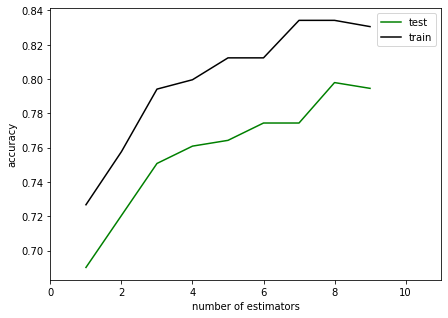

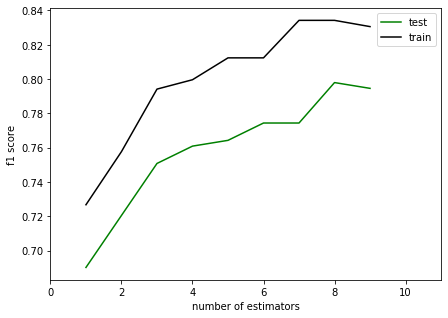

In [88]:
draw(lr)

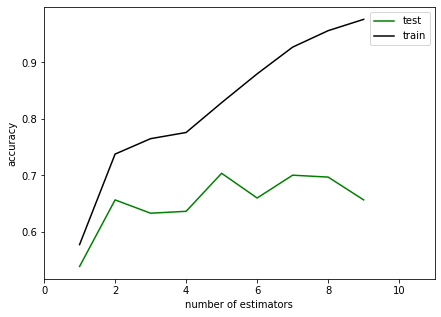

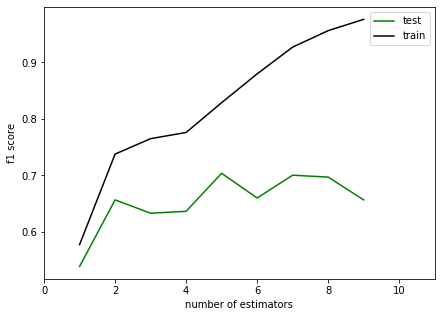

In [89]:
draw(dt)

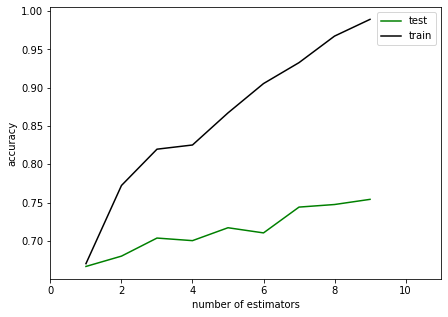

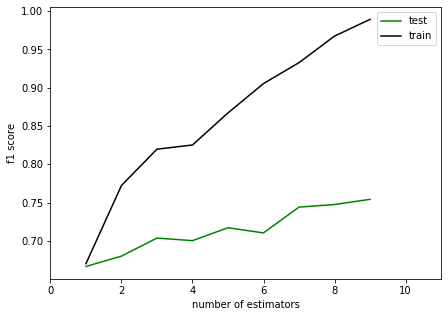

In [90]:
draw(bg_dt)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

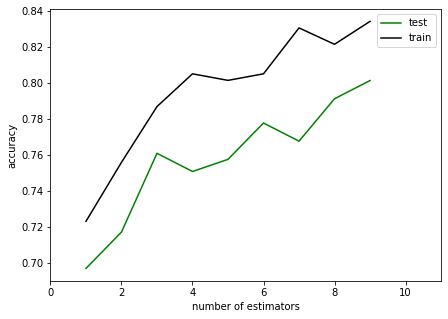

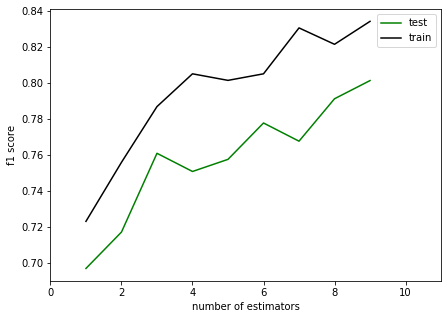

In [91]:
draw(bg_lr)

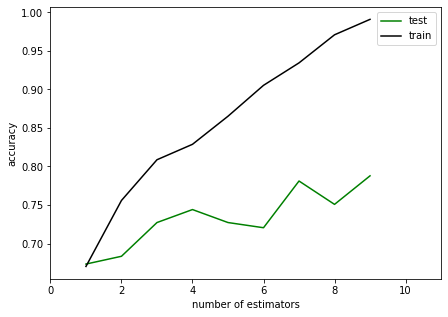

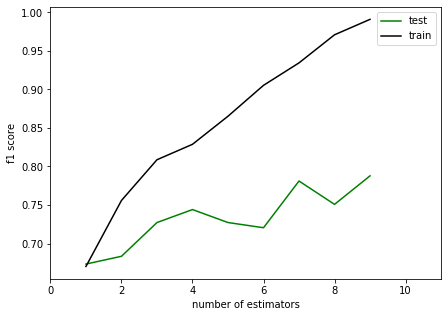

In [92]:
draw(rf)